# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [32]:
import random
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [33]:
it = 0.001
a = -1
b = 1
wi = 0
w_i =[0]

def movimiento(w,N): 
    wi = [w]
    for i in range(N):
        X = np.random.uniform(a,b,1)
        wi.append(wi[-1] + (X*((.001)**(1/2))))
    return wi

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11604\3372016533.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(movimiento(0,10000))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11604\3372016533.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(movimiento(0,10000))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11604\3372016533.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

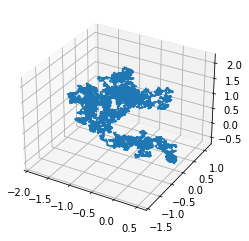

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
x = np.array(movimiento(0,10000))
y = np.array(movimiento(0,10000))
z = np.array(movimiento(0,10000))
plt.plot(x,y,z)

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [35]:
def bolados(capital):
    historia_cartera = []
    cartera = capital
    historia_cartera.append(capital)
    C_bolados = [0]
    while(historia_cartera[-1] > 0):
        moneda = [-1,1]   
        prediccion = [-1,1]
        Cantidad_bolados = C_bolados[-1] + 1
        C_bolados.append(Cantidad_bolados)
        if (historia_cartera[-1] >= 6):
            apuesta = historia_cartera[-1] / 2
            mi_prediccion = random.choice(prediccion)
            r_moneda = random.choice(moneda)
            if (mi_prediccion == r_moneda):
                cartera = cartera + apuesta
                historia_cartera.append(cartera)
            else:
                cartera = cartera - apuesta
                historia_cartera.append(cartera)
        elif ((historia_cartera[-1] < 6) and historia_cartera[-1] >= 2):
            apuesta = 2
            mi_prediccion = random.choice(prediccion)
            r_moneda = random.choice(moneda)
            if (mi_prediccion == r_moneda):
                cartera = cartera + apuesta
                historia_cartera.append(cartera)
            else:
                cartera = cartera - apuesta
                historia_cartera.append(cartera)
        else :
            break
    return historia_cartera
print("No más bolados")
    

No más bolados


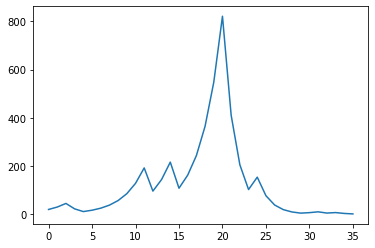

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
historia_cartera = bolados(20)
plt.figure()
plt.plot(historia_cartera)

#### Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [37]:
def Numero_bolados(capital):
    historia_cartera = []
    cartera = capital
    historia_cartera.append(capital)
    C_bolados = [0]
    while(historia_cartera[-1] > 0):
        moneda = [-1,1]   
        prediccion = [-1,1]
        Cantidad_Bolados = C_bolados[-1] + 1
        C_bolados.append(Cantidad_Bolados)
        if (historia_cartera[-1] >= 6):
            apuesta = historia_cartera[-1] / 2
            mi_prediccion = random.choice(prediccion)
            r_moneda = random.choice(moneda)
            if (mi_prediccion == r_moneda):
                cartera = cartera + apuesta
                historia_cartera.append(cartera)
            else:
                cartera = cartera - apuesta
                historia_cartera.append(cartera)
        elif ((historia_cartera[-1] < 6) and historia_cartera[-1] >= 2):
            apuesta = 2
            mi_prediccion = random.choice(prediccion)
            r_moneda = random.choice(moneda)
            if (mi_prediccion == r_moneda):
                cartera = cartera + apuesta
                historia_cartera.append(cartera)
            else:
                cartera = cartera - apuesta
                historia_cartera.append(cartera)
        else :
            break
    return C_bolados[-1]
print("No más boldados")

No más boldados


In [38]:
Numero_bolados(100)

26

In [39]:
tabla1 = pd.DataFrame(columns=["N_Bolados"], index=N)
Apostadores = np.linspace(1,100,100)
for i in (Apostadores):
    tabla1.loc[i, "N_Bolados"] = Numero_bolados(20)
bolados_promedio = np.mean(tabla1["N_Bolados"])
tabla1

,N_Bolados
10.0,22
100.0,8
1000.0,NaN
10000.0,NaN
100000.0,NaN
...,...
95.0,6
96.0,29
97.0,25
98.0,9


In [40]:
tabla = pd.DataFrame(columns=["N_Bolados"], index=N)
Apostadores = np.linspace(1,10000,10000)
for i in (Apostadores):
    tabla.loc[i, "N_Bolados"] = Numero_bolados(20)
bolados_promedio = np.mean(tabla["N_Bolados"])
bolados_promedio

19.7077

### El número de bolados en promedio que tira un apostador con esta estrategia es 19.71.

### Histograma del número de bolados

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([7.500e+03, 1.674e+03, 5.330e+02, 1.740e+02, 7.700e+01, 2.800e+01,
        7.000e+00, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([5.0, 24.5, 44.0, 63.5, 83.0, 102.5, 122.0, 141.5, 161.0, 180.5,
        200.0], dtype=object),
 <BarContainer object of 10 artists>)

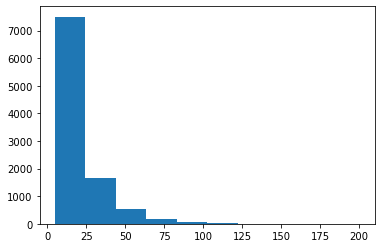

In [41]:
plt.hist(tabla["N_Bolados"])